In [2]:
!pip install --upgrade tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=87adf790aff37429e407e19a1868c908e4a9fbf30373f46a7c0748af960686e4
  Stored in directory: c:\users\sonar\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


In [1]:
import tensorflow
tensorflow.__version__

'2.3.1'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Read data from the file

In [3]:
import h5py;

In [4]:
h5file = h5py.File('SVHN_single_grey1.h5','r')

In [5]:
h5file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [6]:
X_train = h5file['X_train'][:]

In [7]:
X_test = h5file['X_test'][:]

In [8]:
y_train = h5file['y_train'][:]

In [9]:
y_test = h5file['y_test'][:]

# Visualize the data items

Label: 7


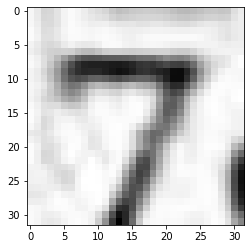

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

Label: 7


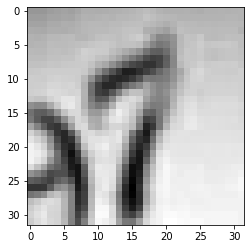

In [12]:
print("Label: {}".format(y_train[2000]))
plt.imshow(X_train[2000], cmap='gray')

Label: 6


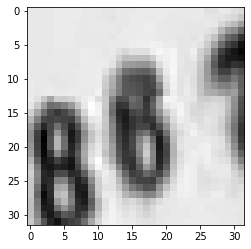

In [13]:
print("Label: {}".format(y_train[500]))
plt.imshow(X_train[500], cmap='gray')

In [14]:
#Print shape

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


# Reshape train and test set of data

In [17]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Normalize the data

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

In [20]:
#Print the shape again

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)
Images in X_train: 42000
Images in X_test: 18000
Max value in X_train: 0.9999
Min value in X_train: 0.0


# One hot encode the y_train and y_test

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Create a model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras import optimizers

In [38]:
model = Sequential()

In [39]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile and Fit the model

In [40]:

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [41]:

model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.2151 - accuracy: 0.1466 - val_loss: 1.8403 - val_accuracy: 0.3179
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.6330 - accuracy: 0.4111 - val_loss: 1.5380 - val_accuracy: 0.4514
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.4897 - accuracy: 0.4782 - val_loss: 1.4190 - val_accuracy: 0.5201
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.3961 - accuracy: 0.5272 - val_loss: 1.3425 - val_accuracy: 0.5526
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.3334 - accuracy: 0.5551 - val_loss: 1.2820 - val_accuracy: 0.5856
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.2768 - accuracy: 0.5817 - val_loss: 1.2368 - val_accuracy: 0.6016
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.2506 - accuracy: 0.5916 - val_loss: 1.2062 - val_accuracy:

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 144,266
Trainable params: 144,266
Non-trainable params: 0
_________________________________________________________________


# Loss and accuracy

In [44]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 3ms/step - loss: 1.1967 - accuracy: 0.6121


[1.1967263221740723, 0.6120555400848389]

# visualize the results

Predicted label: 6
Softmax Outputs: [[2.36755260e-03 1.05555475e-04 1.67439715e-03 3.27812275e-04
  1.19411824e-02 1.71455648e-02 9.36758637e-01 3.51010356e-04
  2.89566033e-02 3.71800910e-04]]
1.0000001


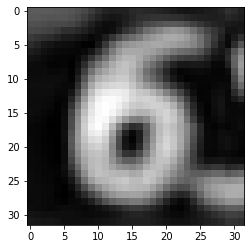

In [46]:
plt.imshow(X_test[500].reshape(32, 32), cmap='gray')
y_pred = model.predict(X_test[500].reshape(1, 32, 32, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 2
Softmax Outputs: [[5.2322089e-03 1.0283266e-02 5.6141520e-01 6.6446617e-02 7.5301097e-04
  1.4335642e-03 4.7884311e-04 3.4544340e-01 1.9618566e-03 6.5519600e-03]]
0.9999999


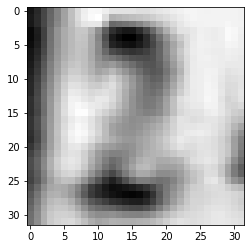

In [47]:
plt.imshow(X_test[1500].reshape(32, 32), cmap='gray')
y_pred = model.predict(X_test[1500].reshape(1, 32, 32, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())